In [6]:
import numpy as np
from keras import datasets, models, layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd

# **Step 1 : Load data**

In [7]:
# Load the dataframe
df = pd.read_csv('spambase.data', header=None)

In [8]:
df.shape

(4601, 58)

In [9]:
df.iloc[:, -1].value_counts()

0    2788
1    1813
Name: 57, dtype: int64

I see that I have an unbalanced dataset. I need to balance it in order to work with it to build our model.

In [10]:
# train test split
# 1500 indexes of class 0 and 1500 indexes class 1, for the training set so as to have 70/30 training/test split
np.random.seed(42)
ind_train_class_0 = np.random.choice(df[df.iloc[:,-1]==0].index, 1500, replace=False)
ind_train_class_1 = np.random.choice(df[df.iloc[:,-1]==1].index, 1500, replace=False)
ind_train = []
s = [ind_train.append(i) for i in ind_train_class_0]
s = [ind_train.append(i) for i in ind_train_class_1]
len(ind_train)

3000

In [11]:
train_data = df.iloc[ind_train,:-1]
train_target = df.iloc[ind_train,-1]
train_target.value_counts()

1    1500
0    1500
Name: 57, dtype: int64

In [12]:
# the rest of the observations will be use for testing
ind_test = []
s = [ind_test.append(i) for i in df.index if (i not in ind_train)]
len(ind_test)

1601

In [13]:
test_data = df.iloc[ind_test,:-1]
test_target = df.iloc[ind_test,-1]

In [14]:
# vectorize
train_data, test_data, train_target, test_target = train_data.to_numpy() , test_data.to_numpy(), train_target.to_numpy(), test_target.to_numpy()

In [15]:
# standardize
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [16]:
# Load_spam_data
def load_spam_data ():

  # Load the dataframe
  df = pd.read_csv('spambase.data', header=None)

  # train test split

  # 1500 indexes of class 0 and 1500 indexes class 1, for the training set so as to have 70/30 training/test split
  np.random.seed(42)                                                                    # Create seed for reproducibility
  ind_train_class_0 = np.random.choice(df[df.iloc[:,-1]==0].index, 1500, replace=False) # Choose randomly
  ind_train_class_1 = np.random.choice(df[df.iloc[:,-1]==1].index, 1500, replace=False) # Choose randomly
  ind_train = []                                                                        # Initialize container of indexes
  [ind_train.append(i) for i in ind_train_class_0]                                      # Get indexes for class 0
  [ind_train.append(i) for i in ind_train_class_1]                                      # Get indexes for class 1
  train_data = df.iloc[ind_train,:-1]                                                   # create training data
  train_target = df.iloc[ind_train,-1]                                                  # create target of the training data
  train_target.value_counts()

  # the rest of the observations will be use for testing
  ind_test = []
  [ind_test.append(i) for i in df.index if (i not in ind_train)]
  test_data = df.iloc[ind_test,:-1]
  test_target = df.iloc[ind_test,-1]

  # vectorize 
  train_data, test_data, train_target, test_target = train_data.to_numpy() , test_data.to_numpy(), train_target.to_numpy(), test_target.to_numpy()

  # normalize
  mean = train_data.mean(axis=0)
  train_data -= mean
  std = train_data.std(axis=0)
  train_data /= std

  test_data -= mean
  test_data /= std

  return (train_data, train_target) , (test_data, test_target)

In [17]:
(train_data, train_target) , (test_data, test_target) = load_spam_data()

In [18]:
train_data.shape

(3000, 57)

# Step 2 : Prepare the data

In [19]:
# Create validation set
# Randomly select 600 data for validation, so as to have 80/20 training/validation split
np.random.seed(42)
ind_val_class_0 = np.random.choice(np.where(train_target == 0)[0], 300, replace=False)
ind_val_class_1 = np.random.choice(np.where(train_target == 1)[0], 300, replace=False)
ind_val = []
s = [ind_val.append(i) for i in ind_val_class_0]
s = [ind_val.append(i) for i in ind_val_class_1]
len(ind_val)

600

In [20]:
# Validation set
x_val = train_data[ind_val]
y_val = train_target[ind_val]
# training set
train_ind = []
s = [train_ind.append(i) for i in np.where(train_target == 0)[0] if i not in ind_val]
s = [train_ind.append(i) for i in np.where(train_target == 1)[0] if i not in ind_val]
x_train = train_data[train_ind]
y_train = train_target[train_ind]
len(y_train)

2400

In [21]:
sum(y_train)

1200

So we have a balanced dataset

# Step 3 : Build the network

In [22]:
model = models.Sequential()
model.add(layers.Dense(26, activation='relu', input_shape=(57,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Step 4 : Train the model

In [24]:
history = model.fit(x_train, y_train, epochs=200, validation_data = (x_val, y_val), batch_size=200)

Epoch 1/200
12/12 [==============================] - 2s 22ms/step - loss: 0.7817 - accuracy: 0.5320 - val_loss: 0.6453 - val_accuracy: 0.6467
Epoch 2/200
12/12 [==============================] - 0s 8ms/step - loss: 0.6196 - accuracy: 0.6885 - val_loss: 0.5418 - val_accuracy: 0.7550
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.5244 - accuracy: 0.7642 - val_loss: 0.4724 - val_accuracy: 0.8083
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.4759 - accuracy: 0.7861 - val_loss: 0.4240 - val_accuracy: 0.8617
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 0.4215 - accuracy: 0.8328 - val_loss: 0.3895 - val_accuracy: 0.8700
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.3930 - accuracy: 0.8475 - val_loss: 0.3632 - val_accuracy: 0.8800
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 0.3614 - accuracy: 0.8704 - val_loss: 0.3419 - val_accuracy: 0.8883
Epoch 8/200


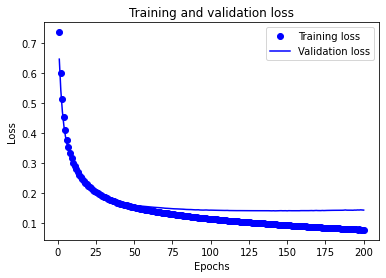

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs,loss, 'bo', label='Training loss') #blue dots
plt.plot(epochs,val_loss, 'b', label='Validation loss') #blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

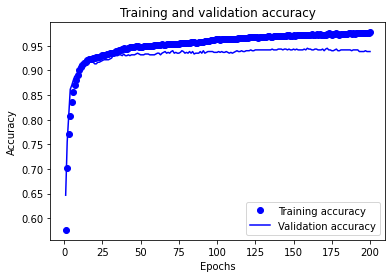

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs,acc, 'bo', label='Training accuracy') #blue dots
plt.plot(epochs,val_acc, 'b', label='Validation accuracy') #blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This model looks good, however the validation accuracy stops improving after 100 epochs so it is better to stop there.

# Step 5 : Final model and evaluation

In [27]:
train_data.shape, test_data.shape

((3000, 57), (1601, 57))

In [28]:
# Save the very last one the prediction in the end
inst_data = test_data[-1]
inst_target = test_target[-1]

In [29]:
model = models.Sequential()
model.add(layers.Dense(26, activation='relu', input_shape=(57,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_target, epochs=100, batch_size=200)

Epoch 1/100
15/15 [==============================] - 0s 3ms/step - loss: 0.8515 - accuracy: 0.4986
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6466
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7723
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8408
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8631
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8798
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8820
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.8997
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8930
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.9024
Epoch 11/

In [30]:
score = model.evaluate(test_data[:-1], test_target[:-1])
score

50/50 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.9244


[0.18926388025283813, 0.9243749976158142]

In [31]:
model.save("/content/drive/My Drive/Colab Notebooks/CS577_colab/SpamBase.h5")

In [32]:
model_loaded = models.load_model("/content/drive/My Drive/Colab Notebooks/CS577_colab/SpamBase.h5")

In [33]:
result = model_loaded.predict(inst_data.reshape(1,-1))

In [34]:
result

array([[6.7150995e-06]], dtype=float32)

In [35]:
inst_target

0

The model works !